# Measurement Plots

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cmaps
import math

# 1. One arccos call

In [37]:
df = pd.read_csv("perf_test_cuda_257136.csv")

## time vs number of streams

[        8        32       128       512      2048      8192     32768
    131072    524288   2097152   8388608  33554432 134217728 536870912]


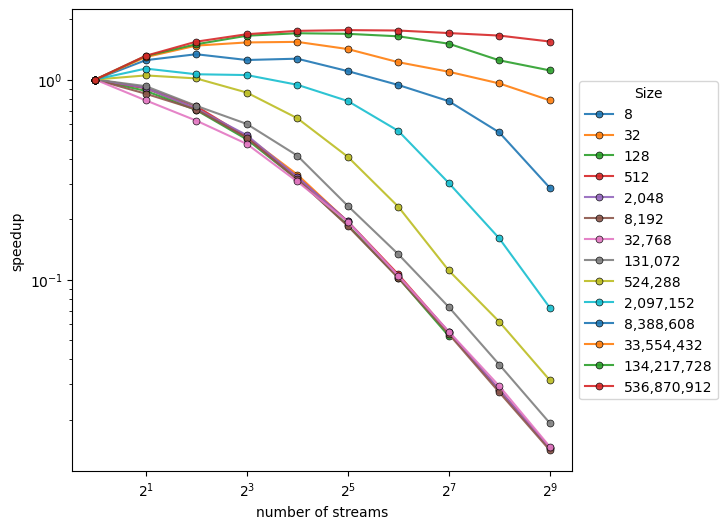

In [38]:
sizes = df['Size'].unique()
print(sizes)
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(sizes):
    sub_df = df[df['Size'] == size]
    times = np.array(sub_df['Time'])
    improvement = times[0] / times
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
#     plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'],
#                 label=f'{size:,}',  # Adds thousands separators
#                 s=10,  # Larger dots
#                 alpha=0.9,  # Slight transparency
#                 edgecolor='black', linewidth=0.5)
    plt.plot(sub_df['NUM_STREAMS'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{size:,}')

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('speedup')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Size')

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

Learnings:

    1. for size <= 131072 (2^19) no runtime improvement by using streams
    2. The optimal chunk size depends on the array size
    3. Larger array sizes achieve larger improvements
    
    (4.) By increasing the array size we increase both computation and memory -> plotting it vs time doesnt give us valuable information -> we plot time vs num_streams for multiple sizes
    


In [39]:
math.log2(8388608)
2**23
math.log2(2097152)
2**21
math.log2(16777216)
2**24

16777216

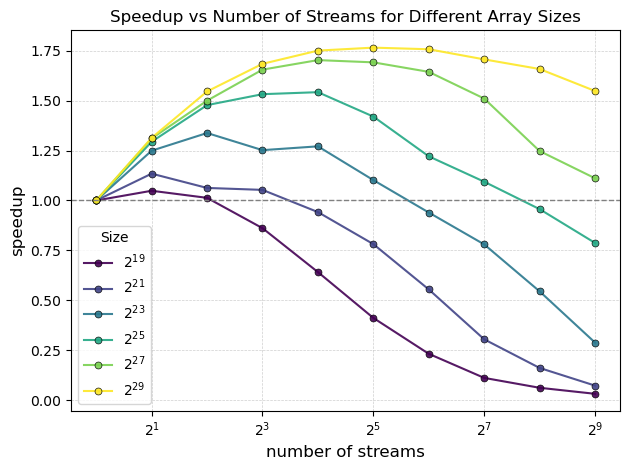

In [70]:
sizes = df['Size'].unique()
reduced_sizes = sizes[sizes > 131072]

numstreams = df['NUM_STREAMS'].unique()

#plt.figure(figsize=(8, 6)) 
colors = plt.cm.viridis(np.linspace(0, 1, len(reduced_sizes)))

for idx, size in enumerate(reduced_sizes):
    sub_df = df[df['Size'] == size]
    times = np.array(sub_df['Time'])
    improvement = times[0] / times
    plt.plot(sub_df['NUM_STREAMS'], improvement,
             marker='o',                # Dots
             markersize=5,              # Similar to s=10 in scatter
             alpha=0.9,                 # Transparency
             markeredgecolor='black',  # Edge color
             markeredgewidth=0.5,      # Edge thickness
             label = f'$2^{{{int(np.log2(size))}}}$',
             color = colors[idx])
    
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams', fontsize = 12)
plt.ylabel('speedup', fontsize = 12)
plt.legend(title="Size", loc='lower left', fontsize='medium', title_fontsize='medium')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.title("Speedup vs Number of Streams for Different Array Sizes")
plt.tight_layout()

plt.savefig('arccos_speedup_streams_size.pdf', bbox_inches='tight')
plt.show()

for 524288/2^19 and  only 2 streams are beneficial


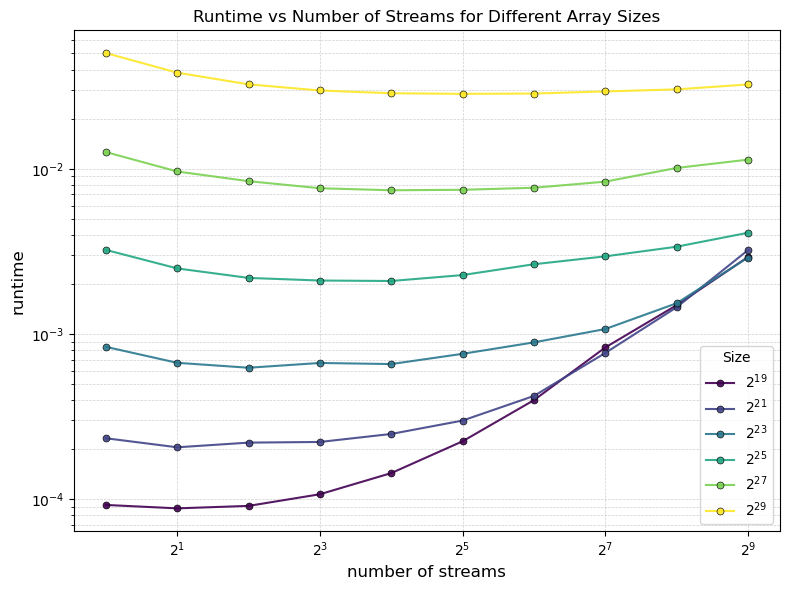

In [41]:
sizes = df['Size'].unique()
reduced_sizes = sizes[sizes > 131072]

numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 
colors = plt.cm.viridis(np.linspace(0, 1, len(reduced_sizes)))

for idx, size in enumerate(reduced_sizes):
    sub_df = df[df['Size'] == size]
    times = np.array(sub_df['Time'])
    improvement = times[0] / times
    plt.plot(sub_df['NUM_STREAMS'], times,
             marker='o',                # Dots
             markersize=5,              # Similar to s=10 in scatter
             alpha=0.9,                 # Transparency
             markeredgecolor='black',  # Edge color
             markeredgewidth=0.5,      # Edge thickness
             label = f'$2^{{{int(np.log2(size))}}}$', #label=f'{size:,}',
             color = colors[idx])
    
#plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams', fontsize = 12)
plt.ylabel('runtime', fontsize = 12)
plt.legend(title="Size", loc='best', fontsize='medium', title_fontsize='medium')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.title("Runtime vs Number of Streams for Different Array Sizes")
plt.tight_layout()

plt.savefig('arccos_runtime_streams_size.pdf', bbox_inches='tight')
plt.show()

In [43]:
size = 536870912
print("results for size = ", size)
print()

sub_df = df[df['Size'] == size]
times = np.array(sub_df['Time'])

for idx in range(len(numstreams)):
    improvement = times[0] / times[idx]
    print(numstreams[idx], " streams, chunksize = ", size / numstreams[idx])
    print("----- speedup ------", improvement)
    print()


results for size =  536870912

1  streams, chunksize =  536870912.0
----- speedup ------ 1.0

2  streams, chunksize =  268435456.0
----- speedup ------ 1.313803005322415

4  streams, chunksize =  134217728.0
----- speedup ------ 1.5461774527831933

8  streams, chunksize =  67108864.0
----- speedup ------ 1.6846019833824712

16  streams, chunksize =  33554432.0
----- speedup ------ 1.7508879448429555

32  streams, chunksize =  16777216.0
----- speedup ------ 1.7657056571970362

64  streams, chunksize =  8388608.0
----- speedup ------ 1.757620246085011

128  streams, chunksize =  4194304.0
----- speedup ------ 1.706881568584852

256  streams, chunksize =  2097152.0
----- speedup ------ 1.6586398902200876

512  streams, chunksize =  1048576.0
----- speedup ------ 1.5485822166512164



## time vs array size

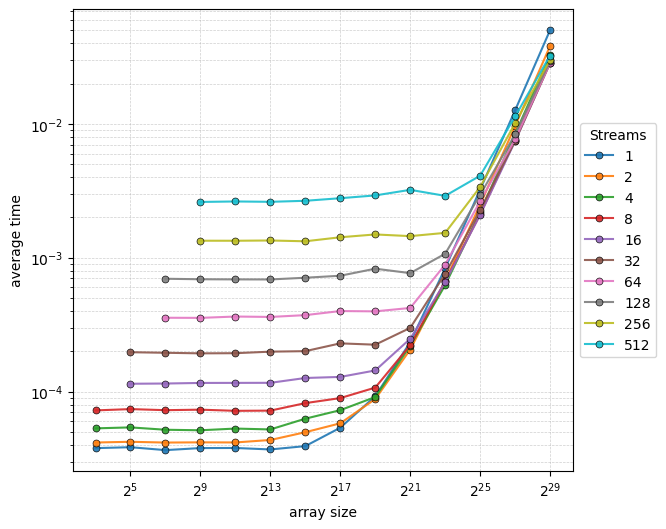

In [44]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(numstreams):
    sub_df = df[df['NUM_STREAMS'] == size]
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
#     plt.scatter(sub_df['Size'], sub_df['Time'],
#                 label=f'{size:,}',  # Adds thousands separators
#                 s=10,  # Larger dots
#                 alpha=0.9,  # Slight transparency
#                 edgecolor='black', linewidth=0.5)
    plt.plot(sub_df['Size'], sub_df['Time'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{size:,}')

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

1. using streams is only beneficial for big array sizes
   otherwise too much stream overhead



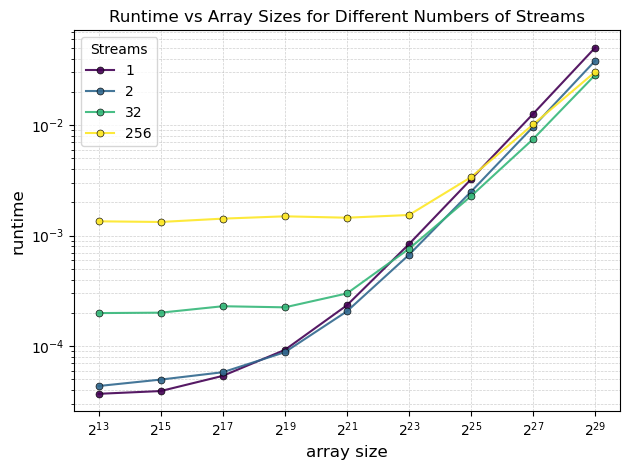

In [45]:
streams = [1, 4, 32, 128]
streams = [1, 2, 32, 256]
colors = plt.cm.viridis(np.linspace(0, 1, len(streams)))

for idx, i in enumerate(streams):
    sub_df = df[(df['NUM_STREAMS'] == i) & (df['Size'] >= 2**13)]
    plt.plot(sub_df['Size'], sub_df['Time'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{i:,}',
                 color = colors[idx])
    
plt.xscale('log', base = 2)
tick_exponents = range(13, 30, 2)
tick_values = [2**e for e in tick_exponents]
tick_labels = [f'$2^{{{e}}}$' for e in tick_exponents]
plt.xticks(tick_values, tick_labels)
plt.yscale('log')
plt.xlabel('array size', fontsize = 12)
plt.ylabel('runtime', fontsize = 12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(title="Streams", loc='best', fontsize='medium', title_fontsize='medium')

plt.title("Runtime vs Array Sizes for Different Numbers of Streams")
plt.tight_layout()

plt.savefig('arccos_runstime_size_streams.pdf', bbox_inches='tight')
plt.show()


In [46]:
size = 2**19
print("results for size = ", size)
print()

sub_df = df[df['Size'] == size]
times = np.array(sub_df['Time'])

for idx in range(len(numstreams)):
    print(numstreams[idx], " streams, runtime = ", times[idx] - times[0])
    print("---- speedup ----- = ", times[0]/times[idx])
    print()

results for size =  524288

1  streams, runtime =  0.0
---- speedup ----- =  1.0

2  streams, runtime =  -4.284499999999996e-06
---- speedup ----- =  1.048740560746813

4  streams, runtime =  -1.2033000000000025e-06
---- speedup ----- =  1.013225198768154

8  streams, runtime =  1.4841299999999996e-05
---- speedup ----- =  0.8613351396804635

16  streams, runtime =  5.155929999999999e-05
---- speedup ----- =  0.6413216183877342

32  streams, runtime =  0.00013177529999999998
---- speedup ----- =  0.4116228501009091

64  streams, runtime =  0.00030533029999999997
---- speedup ----- =  0.23191017284708404

128  streams, runtime =  0.0007363163
---- speedup ----- =  0.11127114501421234

256  streams, runtime =  0.0014014313
---- speedup ----- =  0.06172165611065733

512  streams, runtime =  0.0028313413000000003
---- speedup ----- =  0.031533351804154564



In [47]:
size = 2**29
print("results for size = ", size)
print()

sub_df = df[df['Size'] == size]
times = np.array(sub_df['Time'])

for idx in range(len(numstreams)):
    print(numstreams[idx], " streams, speedup in comparison to 1 stream = ", times[0] / times[idx])
    print()

results for size =  536870912

1  streams, speedup in comparison to 1 stream =  1.0

2  streams, speedup in comparison to 1 stream =  1.313803005322415

4  streams, speedup in comparison to 1 stream =  1.5461774527831933

8  streams, speedup in comparison to 1 stream =  1.6846019833824712

16  streams, speedup in comparison to 1 stream =  1.7508879448429555

32  streams, speedup in comparison to 1 stream =  1.7657056571970362

64  streams, speedup in comparison to 1 stream =  1.757620246085011

128  streams, speedup in comparison to 1 stream =  1.706881568584852

256  streams, speedup in comparison to 1 stream =  1.6586398902200876

512  streams, speedup in comparison to 1 stream =  1.5485822166512164



## time per value vs array size

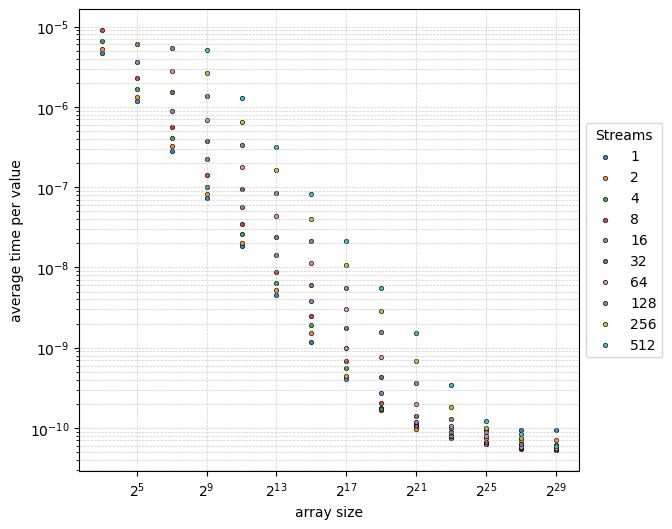

In [48]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, 4))

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(numstreams):
    sub_df = df[df['NUM_STREAMS'] == size]
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
    plt.scatter(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                label=f'{size:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5,)

plt.xscale('log', base = 2)
#plt.yscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time per value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

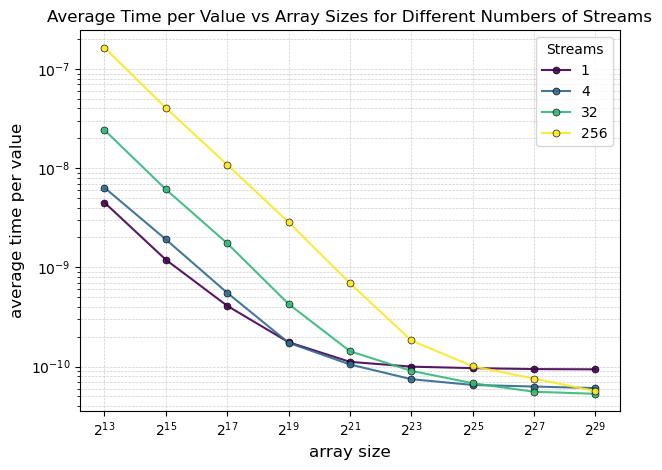

In [49]:
stream_counts = [1, 4, 32, 128, 512]
stream_counts = [1, 4, 32, 256]
colors = plt.cm.viridis(np.linspace(0, 1, len(stream_counts)))

for idx, num_streams in enumerate(stream_counts):
    sub_df = df[(df['NUM_STREAMS'] == num_streams) & (df['Size'] >= 2**13)]
    plt.plot(sub_df['Size'], sub_df['Time'] / sub_df['Size'],
             marker='o',
             markersize=5,
             alpha=0.9,
             markeredgecolor='black',
             markeredgewidth=0.5,
             label=f'{num_streams:,}',
             color = colors[idx] )

plt.xscale('log', base=2)
tick_exponents = range(13, 30, 2)
tick_values = [2**e for e in tick_exponents]
tick_labels = [f'$2^{{{e}}}$' for e in tick_exponents]
plt.xticks(tick_values, tick_labels)
plt.yscale('log')
plt.xlabel('array size', fontsize = 12)
plt.ylabel('average time per value', fontsize = 12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(title="Streams", loc='best', fontsize='medium', title_fontsize='medium')
plt.title("Average Time per Value vs Array Sizes for Different Numbers of Streams")
plt.tight_layout()
plt.savefig('arccos_timepervalue_size.pdf', bbox_inches='tight')
plt.show()

# 2. Multiple arccos calls

# nx, ny vary, nz const

In [50]:
df_multi = pd.read_csv("perf_test_cuda_269302.csv")
df_multi.head()

,Calls,Size,NUM_STREAMS,Time
0,1,8,1,0.000027
1,1,8,2,0.000035
2,1,8,4,0.000043
3,1,32,1,0.000029
4,1,32,2,0.000035


In [51]:
numcalls = df_multi["Calls"].unique()
print(numcalls)

sizes = df_multi["Size"].unique()
print(sizes)

numstreams = df_multi["NUM_STREAMS"].unique()
print(numstreams)


[  1   2   4   8  16  32  64 128 256 512]
[        8        32       128       512      2048      8192     32768
    131072    524288   2097152   8388608  33554432 134217728 536870912]
[  1   2   4   8  16  32  64 128 256 512]


## speedup vs streams 

[  1   2   4   8  16  32  64 128 256 512]


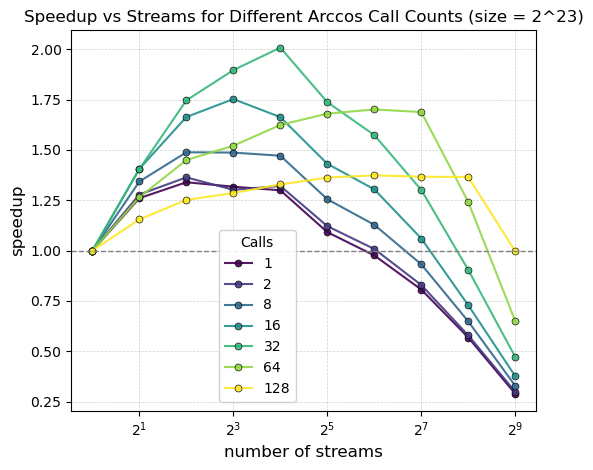

In [76]:
print(numcalls)

reduced_calls = np.array([1, 2, 8, 16, 32, 64, 128])

colors = plt.cm.viridis(np.linspace(0, 1, len(reduced_calls)))



size = 8388608 #134217728 # 536870912 

for idx, call in enumerate(reduced_calls):
        sub_df = df_multi[(df_multi['Size'] == size) & (df_multi['Calls'] == call) ]

        
        if sub_df.empty:
            print(f"Warning: No data for size={size} and Calls={call}")
            continue  # Skip this iteration

        times = np.array(sub_df['Time'])
        improvement = times[0] / times
        plt.plot(sub_df['NUM_STREAMS'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{call:,}',
                color = colors[idx])

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams', fontsize=12)
plt.ylabel('speedup', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Speedup vs Streams for Different Arccos Call Counts (size = 2^23)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
#plt.legend(title="Calls", loc='best', fontsize='medium', title_fontsize='medium')
plt.legend(
    title="Calls",
    loc='center',             # position relative to anchor
    bbox_to_anchor=(0.4, 0.25),  # (x, y) in axis coordinates
    fontsize='medium',
    title_fontsize='medium',
    framealpha=0.9
)
#plt.savefig(f"multiple_arccos_speedup_streams_calls_{size}.pdf")
plt.savefig("report_multiple_arccos_speedup.pdf")
plt.show()

In [53]:
size = 2**23
print("results for size = ", size)
print()

sub_df = df_multi[df_multi['Size'] == size]
times = np.array(sub_df['Time'])

for jdx in range(len(numcalls)):
    print("results for numcalls = ", numcalls[jdx])
    print()
    for idx in range(len(numstreams)):
        sub_df = df_multi[(df_multi['Size'] == size) & (df_multi['Calls'] == numcalls[jdx])]
        times = np.array(sub_df['Time'])
        print(numstreams[idx], " streams, speedup in comparison to 1 stream = ", times[0] / times[idx])
        print()

results for size =  8388608

results for numcalls =  1

1  streams, speedup in comparison to 1 stream =  1.0

2  streams, speedup in comparison to 1 stream =  1.2604869099563665

4  streams, speedup in comparison to 1 stream =  1.3396350078880719

8  streams, speedup in comparison to 1 stream =  1.3173937405465281

16  streams, speedup in comparison to 1 stream =  1.299541040383015

32  streams, speedup in comparison to 1 stream =  1.091685487951023

64  streams, speedup in comparison to 1 stream =  0.9760618353592765

128  streams, speedup in comparison to 1 stream =  0.8063917525773195

256  streams, speedup in comparison to 1 stream =  0.5683163336593545

512  streams, speedup in comparison to 1 stream =  0.2888191436483704

results for numcalls =  2

1  streams, speedup in comparison to 1 stream =  1.0

2  streams, speedup in comparison to 1 stream =  1.2786776467617804

4  streams, speedup in comparison to 1 stream =  1.3637096535848339

8  streams, speedup in comparison to 1 stre

## runtime vs streams 

[  1   2   4   8  16  32  64 128 256 512]


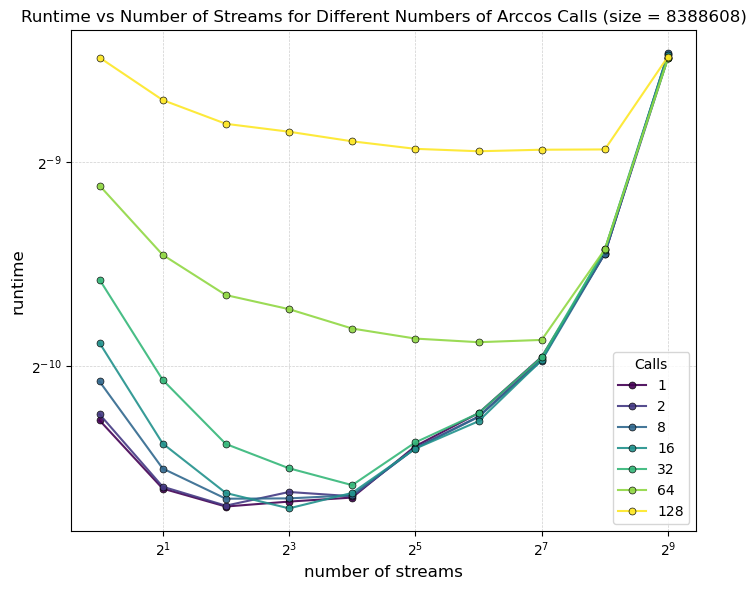

In [54]:
plt.figure(figsize=(8, 6))
print(numcalls)

reduced_calls = np.array([1, 2, 8, 16, 32, 64, 128])

colors = plt.cm.viridis(np.linspace(0, 1, len(reduced_calls)))



#size = 134217728

for idx, call in enumerate(reduced_calls):
        sub_df = df_multi[(df_multi['Size'] == size) & (df_multi['Calls'] == call) ]
        
        if sub_df.empty:
            print(f"Warning: No data for size={size} and Calls={call}")
            continue  # Skip this iteration

        times = np.array(sub_df['Time'])
        improvement = times[0] / times
        plt.plot(sub_df['NUM_STREAMS'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{call:,}',
                color = colors[idx])

plt.xscale('log', base = 2)
plt.yscale('log', base = 2)
plt.xlabel('number of streams', fontsize=12)
plt.ylabel('runtime', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Runtime vs Number of Streams for Different Numbers of Arccos Calls (size = {size})")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
#plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.legend(title="Calls", loc='best', fontsize='medium', title_fontsize='medium')
#plt.savefig(f"multiple_arccos_runtime_streams_calls_size_{size}.pdf")
plt.savefig("report_multiple_arccos_runtime.pdf")
plt.show()

[  1   2   4   8  16  32  64 128 256 512]


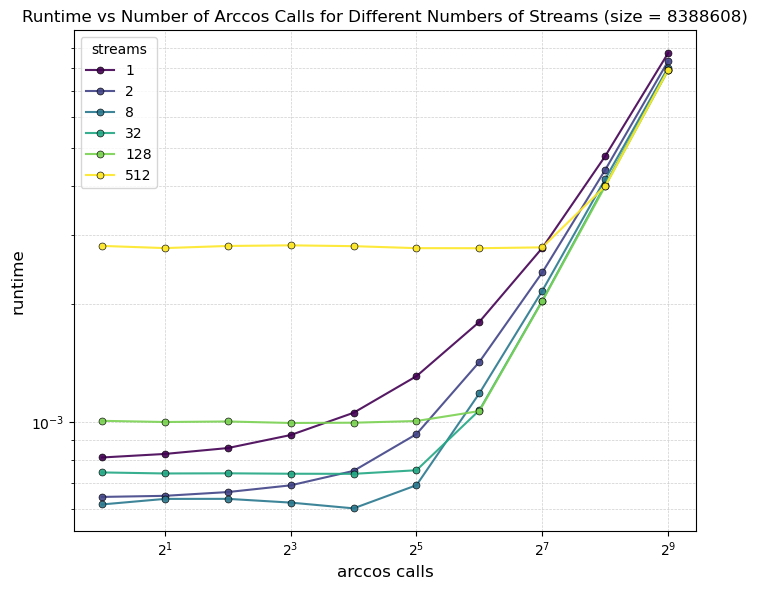

In [55]:
plt.figure(figsize=(8, 6))
print(numcalls)

reduced_calls = np.array([1, 2, 4, 8, 16, 32, 64, 128])

red_numstreams = np.array([1, 2, 8, 32, 128, 512])

colors = plt.cm.viridis(np.linspace(0, 1, len(red_numstreams)))



size = 8388608# 134217728

for idx, streams in enumerate(red_numstreams):
        sub_df = df_multi[(df_multi['Size'] == size) & (df_multi['NUM_STREAMS'] == streams) ]
        
        if sub_df.empty:
            print(f"Warning: No data for size={size} and streams={streams}")
            continue  # Skip this iteration

        times = np.array(sub_df['Time'])
        improvement = times[0] / times
        plt.plot(sub_df['Calls'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{streams:,}',
                color = colors[idx])

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('arccos calls', fontsize=12)
plt.ylabel('runtime', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Runtime vs Number of Arccos Calls for Different Numbers of Streams (size = {size})")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
#plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.legend(title="streams", loc='best', fontsize='medium', title_fontsize='medium')
plt.savefig(f"multiple_arccos_runtime_calls_streams_size_{size}.pdf")
plt.show()

# 3. Stencil

nz = 64 const

In [56]:
df_stencil = pd.read_csv("stencil_gpu_scaling_265180.csv")
df_stencil.head()

,ranks,nx,ny,nz,num_iter,time,streams
0,###1,8,8,64,32,0.006015,1
1,###1,8,8,64,32,0.005142,2
2,###1,8,8,64,32,0.004651,4
3,###1,8,8,64,32,0.004506,8
4,###1,8,8,64,32,0.005080,16


In [57]:
nz = df_stencil["nz"].unique()
print(nz)

timesteps = df_stencil["num_iter"].unique()
print(timesteps)

numstreams = df_stencil["streams"].unique()
print(numstreams)

gridx = df_stencil["nx"].unique()
print(gridx)

[64]
[  32   64  128  256  512 1024]
[  1   2   4   8  16  32  64 128 256]
[   8   16   32   64  128  256  512 1024 2048 4096]


## speedup vs streams for fixed grid size and variable number of iterations

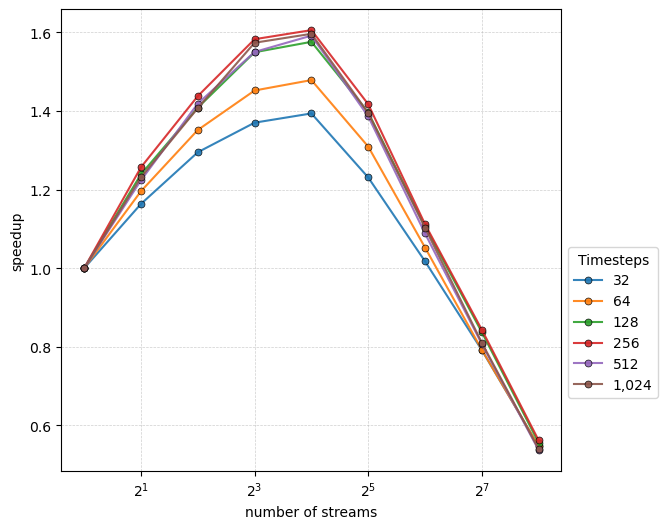

In [58]:
numstreams = df_stencil['streams'].unique()
timesteps = df_stencil['num_iter'].unique()

nx = 256#512#4096 #1024 #512 #128
ny = 256#512#4096 #1024 #512 #128

plt.figure(figsize=(8, 6)) 

for idx, tsteps in enumerate(timesteps):
    sub_df = df_stencil[(df_stencil['num_iter'] == tsteps) & (df_stencil['nx'] == nx) & (df_stencil['ny'] == ny)]
    times = np.array(sub_df['time'])
    improvement = times[0] / times
    plt.plot(sub_df['streams'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{tsteps:,}')

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('speedup')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), title='Timesteps')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
#plt.title(f"Speedup for nx = ny = ", nx, " and nz = 64")

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.savefig("stencil_nx_256_nz_fixed.pdf")
plt.show()

[   8   16   32   64  128  256  512 1024 2048 4096]


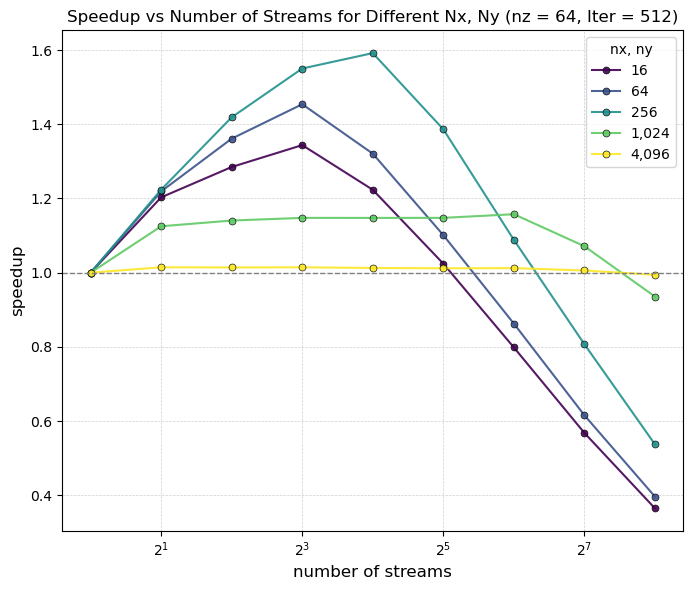

In [59]:
numstreams = df_stencil['streams'].unique()

tsteps = 512

gridx = df_stencil["nx"].unique()
print(gridx)
gridx_second = gridx[1::2]

plt.figure(figsize=(8, 6)) 
colors = plt.cm.viridis(np.linspace(0, 1, len(gridx_second)))
#colors = plt.cm.viridis(np.linspace(0, 1, len(gridx)))

for idx, nx in enumerate(gridx_second):
#for idx, nx in enumerate(gridx):
    sub_df = df_stencil[(df_stencil['num_iter'] == tsteps) & (df_stencil['nx'] == nx) & (df_stencil['ny'] == nx)]
    times = np.array(sub_df['time'])
    improvement = times[0] / times
    plt.plot(sub_df['streams'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{nx:,}',
                 color = colors[idx])

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams', fontsize=12)
plt.ylabel('speedup', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Speedup vs Number of Streams for Different Nx, Ny (nz = 64, Iter = {tsteps})")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.legend(title="nx, ny", loc='best', fontsize='medium', title_fontsize='medium')
plt.savefig(f"stencil_speedup_streams_nx_ny.pdf")

plt.savefig(f"stencil_nx_{nx}_nz_fixed.pdf")
plt.show()

[   8   16   32   64  128  256  512 1024 2048 4096]


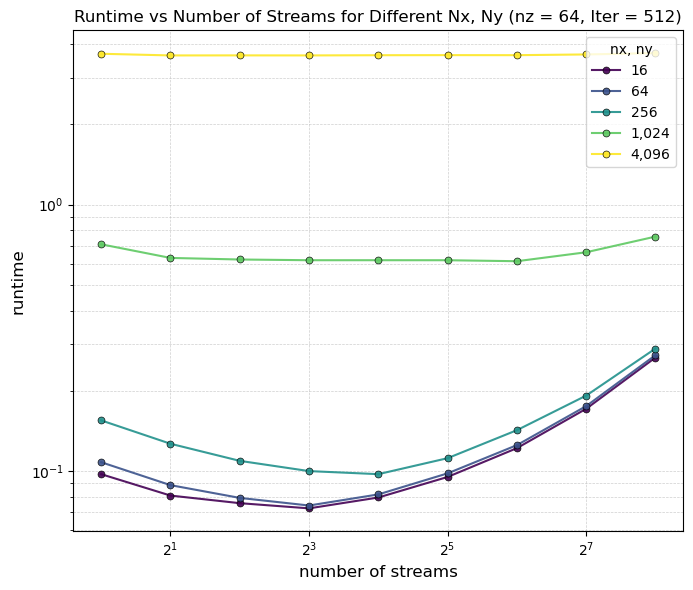

In [60]:
numstreams = df_stencil['streams'].unique()

tsteps = 512

gridx = df_stencil["nx"].unique()
print(gridx)
gridx_second = gridx[1::2]

plt.figure(figsize=(8, 6)) 
colors = plt.cm.viridis(np.linspace(0, 1, len(gridx_second)))
#colors = plt.cm.viridis(np.linspace(0, 1, len(gridx)))

for idx, nx in enumerate(gridx_second):
#for idx, nx in enumerate(gridx):
    sub_df = df_stencil[(df_stencil['num_iter'] == tsteps) & (df_stencil['nx'] == nx) & (df_stencil['ny'] == nx)]
    times = np.array(sub_df['time'])
    improvement = times[0] / times
    plt.plot(sub_df['streams'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{nx:,}',
                 color = colors[idx])

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams', fontsize=12)
plt.ylabel('runtime', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Runtime vs Number of Streams for Different Nx, Ny (nz = 64, Iter = {tsteps})")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
#plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.legend(title="nx, ny", loc='best', fontsize='medium', title_fontsize='medium')
plt.savefig(f"stencil_runtime_streams_nx_ny.pdf")

plt.savefig(f"stencil_nx_{nx}_nz_fixed.pdf")
plt.show()

For grid 128 x 128 x 64:
1. best speedup for 128 timesteps (~ 1.4)
2. for all timesteps 8 streams show best speedup

better speedups for nx = ny = 256 and 512 -> up to 1.6

low speedup for nx = ny = 1024

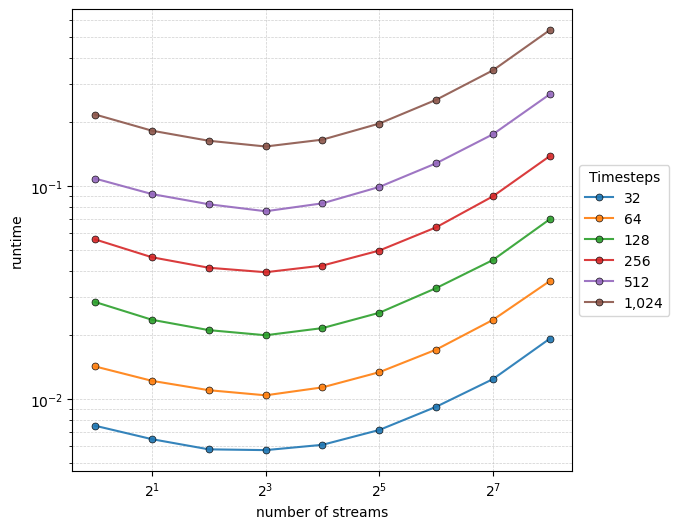

In [61]:
numstreams = df_stencil['streams'].unique()
timesteps = df_stencil['num_iter'].unique()

nx = 128
ny = 128

plt.figure(figsize=(8, 6)) 

for idx, tsteps in enumerate(timesteps):
    sub_df = df_stencil[(df_stencil['num_iter'] == tsteps) & (df_stencil['nx'] == nx) & (df_stencil['ny'] == ny)]
    times = np.array(sub_df['time'])
    improvement = times[0] / times

    plt.plot(sub_df['streams'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{tsteps:,}')

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('runtime')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Timesteps')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)


# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.show()

# nx = ny = 128 const, nz varies

In [62]:
df_nz = pd.read_csv("stencil_gpu_scaling_265510.csv")
df_nz.head()

,Nx,Ny,Nz,NUM_ITER,NUM_STREAMS,Time
0,128,128,8,32,1,0.001981
1,128,128,8,32,2,0.001855
2,128,128,8,32,4,0.001820
3,128,128,8,32,8,0.001999
4,128,128,8,32,16,0.002447


In [63]:
nz = df_nz["Nz"].unique()
print(nz)

timesteps = df_nz["NUM_ITER"].unique()
print(timesteps)

numstreams = df_nz["NUM_STREAMS"].unique()
print(numstreams)

gridx = df_nz["Nx"].unique()
print(gridx)

[    8    16    32    64   128   256   512  1024  2048  4096  8192 16384
 32768 65536]
[  32   64  128  256  512 1024]
[  1   2   4   8  16  32  64 128 256]
[128]


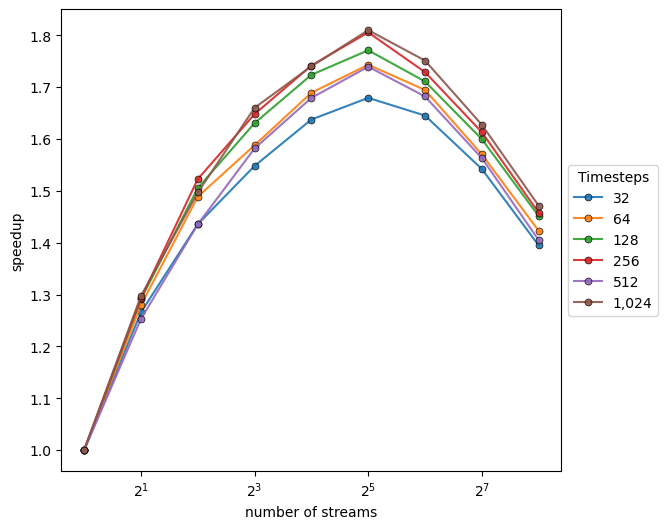

In [64]:
numstreams = df_nz['NUM_STREAMS'].unique()

nz = 1024 

plt.figure(figsize=(8, 6)) 

for idx, tsteps in enumerate(timesteps):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nz)]
    
    if sub_df.empty:
            print(f"Warning: No data for Num_Iter={tsteps} and nz={nzs}")
            continue  # Skip this iteration

    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    plt.plot(sub_df['NUM_STREAMS'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{tsteps:,}')

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('speedup')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Timesteps')

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.show()

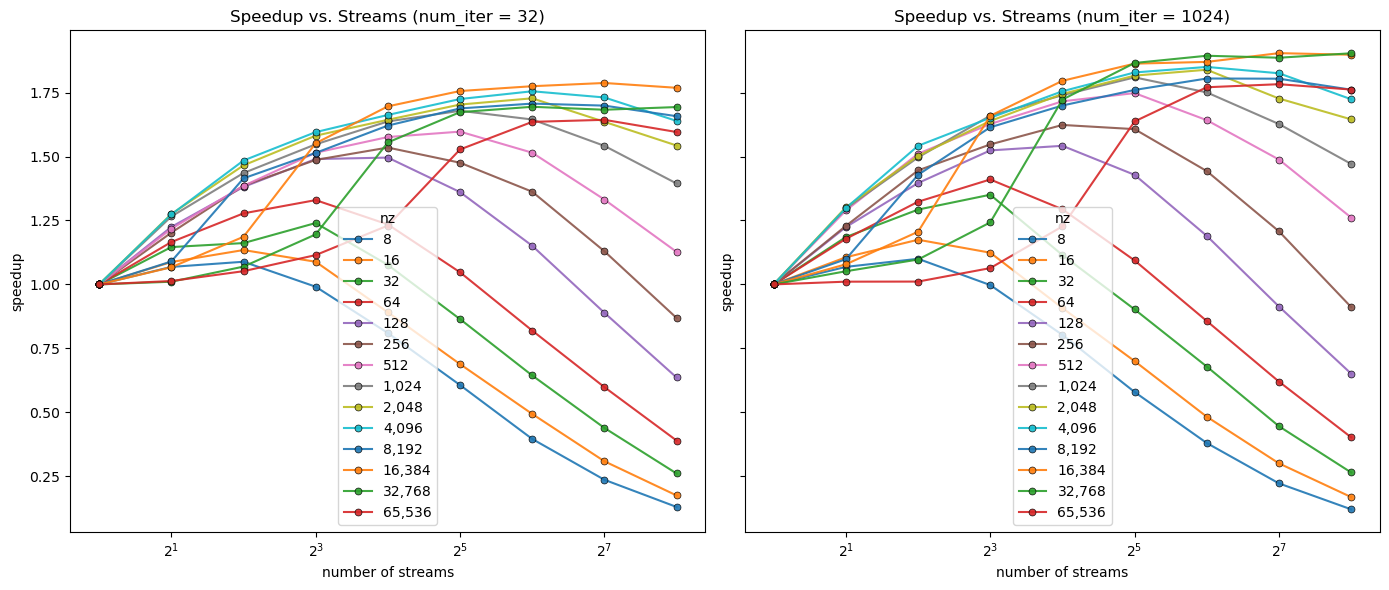

In [65]:
numstreams = df_nz['NUM_STREAMS'].unique()
nz = df_nz["Nz"].unique()

tsteps = 32

# subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


for idx, nzs in enumerate(nz):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nzs)]
    
    if sub_df.empty:
        print(f"Warning: No data for Num_Iter={tsteps} and nz={nzs}")
        continue

    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    axs[0].plot(sub_df['NUM_STREAMS'], improvement,
                marker='o',
                markersize=5,
                alpha=0.9,
                markeredgecolor='black',
                markeredgewidth=0.5,
                label=f'{nzs:,}')

axs[0].set_xscale('log', base=2)
axs[0].set_xlabel('number of streams')
axs[0].set_ylabel('speedup')
axs[0].set_title('Speedup vs. Streams (num_iter = 32)')
axs[0].legend(loc='best', title='nz')

tsteps = 1024

for idx, nzs in enumerate(nz):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nzs)]
    
    if sub_df.empty:
        print(f"Warning: No data for Num_Iter={tsteps} and nz={nzs}")
        continue

    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    axs[1].plot(sub_df['NUM_STREAMS'], improvement,
                marker='o',
                markersize=5,
                alpha=0.9,
                markeredgecolor='black',
                markeredgewidth=0.5,
                label=f'{nzs:,}')

axs[1].set_xscale('log', base=2)
axs[1].set_xlabel('number of streams')
axs[1].set_ylabel('speedup')
axs[1].set_title('Speedup vs. Streams (num_iter = 1024)')
axs[1].legend(loc='best', title='nz')

plt.tight_layout()
plt.show()


-> number of iterations verändert das Ergebnis nur minimal , deshalb wähle num_iter = 512 für Analyse

[    8    32   128   512  2048  8192 32768]


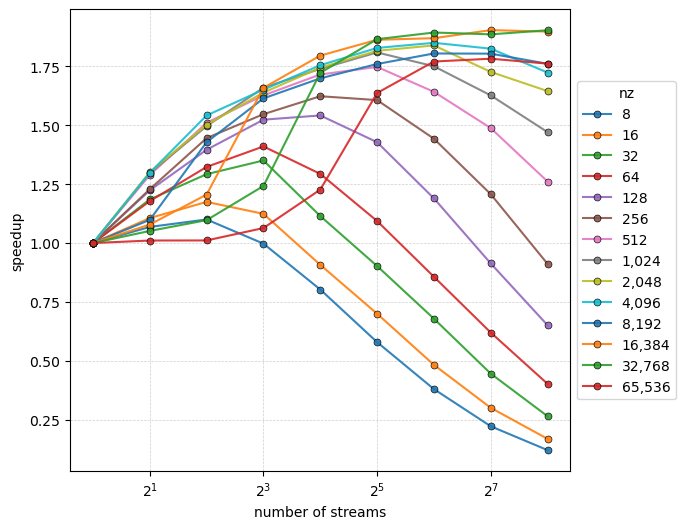

In [66]:
numstreams = df_nz['NUM_STREAMS'].unique()
nz = df_nz['Nz'].unique()
nz_second = nz[::2]
print(nz_second)

timesteps = 512 

plt.figure(figsize=(8, 6)) 

for idx, nzs in enumerate(nz):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nzs)]
    
    if sub_df.empty:
            print(f"Warning: No data for Num_Iter={tsteps} and nz={nzs}")
            continue  # Skip this iteration

    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    plt.plot(sub_df['NUM_STREAMS'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{nzs:,}')

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('speedup')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.show()

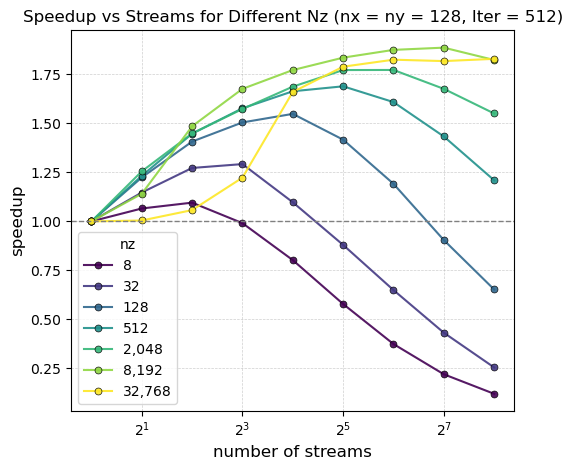

In [80]:
####### use for report #############################

tsteps = 512 

#plt.figure(figsize=(8, 6)) 

colors = plt.cm.viridis(np.linspace(0, 1, len(nz_second)))



for idx, nzs in enumerate(nz_second):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nzs)]
    
    if sub_df.empty:
            print(f"Warning: No data for Num_Iter={tsteps} and nz={nzs}")
            continue  # Skip this iteration

    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    plt.plot(sub_df['NUM_STREAMS'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{nzs:,}',
                 color=colors[idx])

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams', fontsize=12)
plt.ylabel('speedup', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Speedup vs Streams for Different Nz (nx = ny = 128, Iter = {tsteps})")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.legend(title="nz", loc='best', fontsize='medium', title_fontsize='medium')
plt.savefig(f"stencil_speedup_streams_nz.pdf")
plt.show()

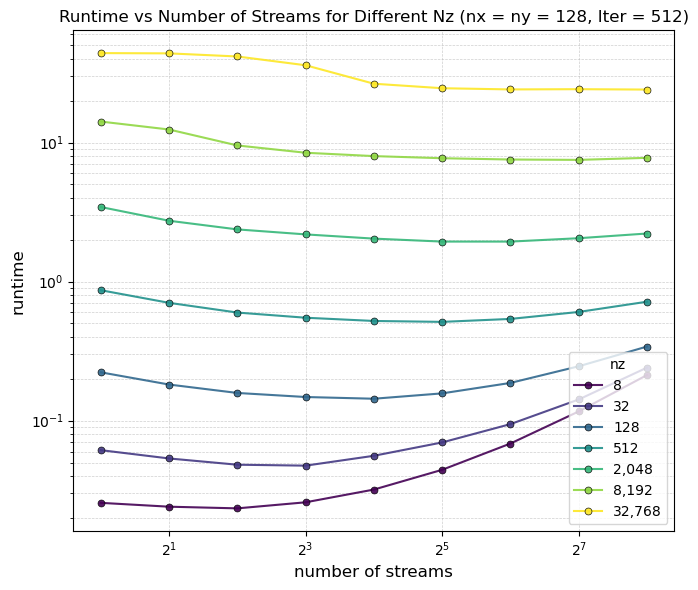

In [68]:
####### use for report #############################

tsteps = 512 

plt.figure(figsize=(8, 6)) 

colors = plt.cm.viridis(np.linspace(0, 1, len(nz_second)))



for idx, nzs in enumerate(nz_second):
    sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nzs)]
    
    if sub_df.empty:
            print(f"Warning: No data for Num_Iter={tsteps} and nz={nzs}")
            continue  # Skip this iteration

    times = np.array(sub_df['Time'])
    improvement = times[0] / times

    plt.plot(sub_df['NUM_STREAMS'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{nzs:,}',
                 color=colors[idx])

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams', fontsize=12)
plt.ylabel('runtime', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='nz')
plt.title(f"Runtime vs Number of Streams for Different Nz (nx = ny = 128, Iter = {tsteps})")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
#plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.legend(title="nz", loc='lower right', fontsize='medium', title_fontsize='medium')
plt.savefig(f"stencil_runtime_streams_nz.pdf")
plt.show()

In [69]:
tsteps = 512
nz = 8192
print("results for iterations = ", tsteps," and nz = ", nz)
print()

sub_df = df_nz[(df_nz['NUM_ITER'] == tsteps) & (df_nz['Nz'] == nz)]
times = np.array(sub_df['Time'])

for idx in range(len(numstreams)):
    improvement = times[0] / times[idx]
    print(numstreams[idx], " streams")
    print("----- speedup ------", improvement)
    print()

results for iterations =  512  and nz =  8192

1  streams
----- speedup ------ 1.0

2  streams
----- speedup ------ 1.1407482614966842

4  streams
----- speedup ------ 1.4852225767092577

8  streams
----- speedup ------ 1.6760551707807967

16  streams
----- speedup ------ 1.7719345237350208

32  streams
----- speedup ------ 1.8352729483660952

64  streams
----- speedup ------ 1.8748890837189467

128  streams
----- speedup ------ 1.8862981957530043

256  streams
----- speedup ------ 1.8233007658048679

